In [1]:
from frgpascal.analysis.processing import load_all
import matplotlib.pyplot as plt
from pathlib import Path
import json # load maestro logs
import pandas as pd
import numpy as np

In [2]:
# load a csv file

path = 'data/output/20221011_B9-char_1/'
metrics = pd.read_csv(path + 'fitted_characterization_metrics.csv')
metrics

,Unnamed: 0,pl_intensity_0,pl_peakev_0,pl_fwhm_0,t_bandgap_0,t_samplepresent_0,df_median_0,bf_inhomogeneity_0,name
0,sample0,174.176938,1.677392,0.096823,NaN,True,140.03584,0.154434,sample0
1,sample1,175.216607,1.676216,0.098287,NaN,True,140.84517,0.034818,sample1
2,sample2,253.082279,1.677381,0.097397,NaN,True,140.30478,0.033021,sample2
3,sample3,183.368298,1.677104,0.097168,1.764107,True,139.91630,0.036609,sample3
4,sample4,279.598707,1.677065,0.096425,NaN,True,140.98710,0.031844,sample4
5,sample5,210.086825,1.676960,0.095493,1.854573,True,140.95224,0.123810,sample5
6,sample6,235.359654,1.677107,0.096805,NaN,True,141.80391,0.032335,sample6
7,sample7,160.327952,1.676423,0.096087,1.844298,True,141.10165,0.034108,sample7
8,sample8,176.236739,1.676698,0.098563,NaN,True,140.71817,0.052047,sample8
9,sample9,83.560557,1.677186,0.101346,NaN,True,140.06075,0.036251,sample9


Text(0.5, 0, 'pl_peakev_0')

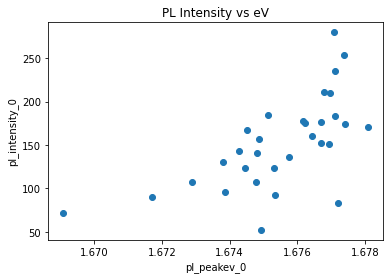

In [3]:
plt.title('PL Intensity vs eV')
plt.scatter(metrics['pl_peakev_0'], metrics['pl_intensity_0'])
plt.ylabel('pl_intensity_0')
plt.xlabel('pl_peakev_0')

Text(0.5, 0, 'Sample Number')

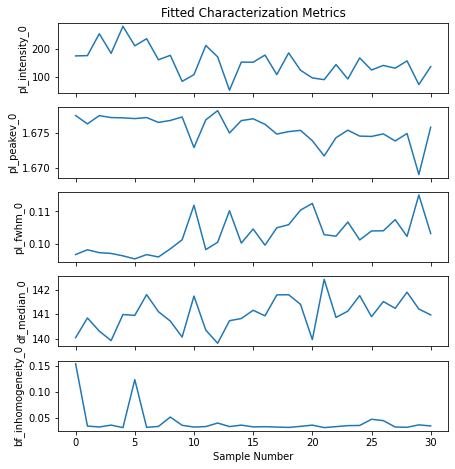

In [4]:
# visualize the change in metrics over time
# note a line graph only makes sense if the samples are indeed sequential

columns = ['pl_intensity_0', 'pl_peakev_0', 'pl_fwhm_0', 'df_median_0', 'bf_inhomogeneity_0']
nrows=len(columns)

fig, ax = plt.subplots(nrows=nrows, ncols=1, sharex=True, figsize=(7,nrows*1.5))
ax[0].set_title('Fitted Characterization Metrics')

for i in range(nrows):
    plt.subplot(nrows,1,i+1)
    plt.ylabel(columns[i])
    plt.plot(metrics[columns[i]])
plt.xlabel('Sample Number')

In [5]:
from natsort import index_natsorted

def load_all_sorted(chardir):
	metricdf, rawdf = load_all(
		chardir,
		t_kwargs=dict(
			wlmin=700,
			wlmax=900
		)
	)
	rawdf= rawdf.sort_values(
   		by='name',
   		key=lambda x: np.argsort(index_natsorted(rawdf['name']))
    )
	rawdf = rawdf.reset_index(drop=True)


	metricdf= metricdf.sort_values(
    	by='name',
    	key=lambda x: np.argsort(index_natsorted(metricdf['name']))
    )
	metricdf = metricdf.reset_index(drop=True)
	return metricdf, rawdf

In [6]:
chardir_0 = 'data/output/20221011_B9-char_1/Characterization/'
metricdf, rawdf = load_all_sorted(chardir_0)

Loading data:   0%|          | 0/31 [00:00<?, ?sample/s]/home/kcw/anaconda3/lib/python3.9/site-packages/frgpascal/analysis/processing.py:103: RuntimeWarning: invalid value encountered in log10
  a = -np.log10(t)
Loading data:  13%|█▎        | 4/31 [00:42<04:53, 10.85s/sample]/home/kcw/anaconda3/lib/python3.9/site-packages/frgpascal/analysis/processing.py:103: RuntimeWarning: divide by zero encountered in log10
  a = -np.log10(t)
Loading data: 100%|██████████| 31/31 [06:02<00:00, 11.69s/sample]


In [7]:
metricdf.columns

Index(['pl_intensity_0', 'pl_peakev_0', 'pl_fwhm_0', 't_bandgap_0',
       't_samplepresent_0', 'df_median_0', 'bf_inhomogeneity_0', 'name'],
      dtype='object')

In [8]:
# determine what type of data
for c in rawdf.columns:
    print(c, type(rawdf[c][0]))
print('pl_0 keys: ' + str(rawdf['pl_0'][0].keys()))
print('pl_0["wl"] shape: ' + str(rawdf['pl_0'][0]['wl'].shape))
print('pl_0["cps"] shape: ' + str(rawdf['pl_0'][0]['cps'].shape))

print('t_0 keys: ' + str(rawdf['t_0'][0].keys()))
print('t_0["wl"] shape: ' + str(rawdf['t_0'][0]['wl'].shape))
print('t_0["t"] shape: ' + str(rawdf['t_0'][0]['t'].shape))
print('t_0["a"] shape: ' + str(rawdf['t_0'][0]['a'].shape))

print('df_0 shape: ' + str(rawdf['df_0'][0].shape))
print('bf_0 shape: ' + str(rawdf['bf_0'][0].shape))
print('plimg_0 shape: ' + str(rawdf['plimg_0'][0].shape))

rawdf.head(1)

pl_0 <class 'dict'>
t_0 <class 'dict'>
df_0 <class 'numpy.ndarray'>
bf_0 <class 'numpy.ndarray'>
plimg_0 <class 'numpy.ndarray'>
name <class 'str'>
pl_0 keys: dict_keys(['wl', 'cps'])
pl_0["wl"] shape: (2048,)
pl_0["cps"] shape: (2048,)
t_0 keys: dict_keys(['wl', 't', 'a'])
t_0["wl"] shape: (2047,)
t_0["t"] shape: (2047,)
t_0["a"] shape: (2047,)
df_0 shape: (1080, 1440, 3)
bf_0 shape: (1080, 1440, 3)
plimg_0 shape: (1080, 1440, 3)


,pl_0,t_0,df_0,bf_0,plimg_0,name
0,"{'wl': [178.95, 179.38, 179.8, 180.23, 180.65,...","{'wl': [179.38, 179.8, 180.23, 180.65, 181.08,...","[[[96.16787, 57.04131, 0.0], [96.99463, 56.334...","[[[0.6191406, 0.53027344, 0.6425781], [0.59277...","[[[0.81152344, 0.61328125, 0.0], [0.85058594, ...",sample0


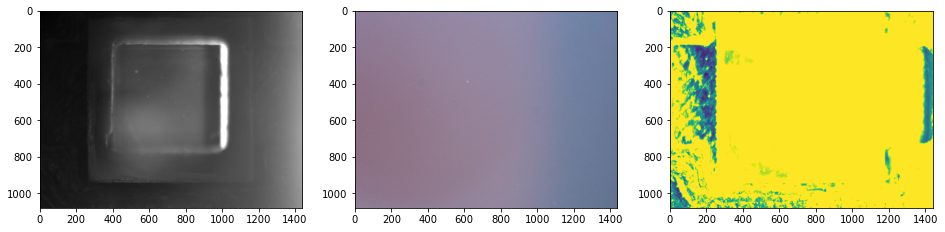

In [9]:
# plot images

fig, ax = plt.subplots(1,3, figsize=(16,10))
i=20

ax[0].imshow(rawdf['df_0'][i][:,:,0], cmap='gray')
ax[1].imshow(rawdf['bf_0'][i])
ax[2].imshow(rawdf['plimg_0'][i][:,:,0]) # use red channel for PL measurements, since that's what bandgap energy is

1.3934172e+02 25.49348
8.520443e+01 16.990019
6.1746343e-04 0.12633306
5.3244275e-01 0.06510641
4.982028e-01 0.031238679
5.9941477e-01 0.043810867
9.720584e-01 0.07692035
7.60363e-01 0.18147022
3.3349842e-01 0.28172225


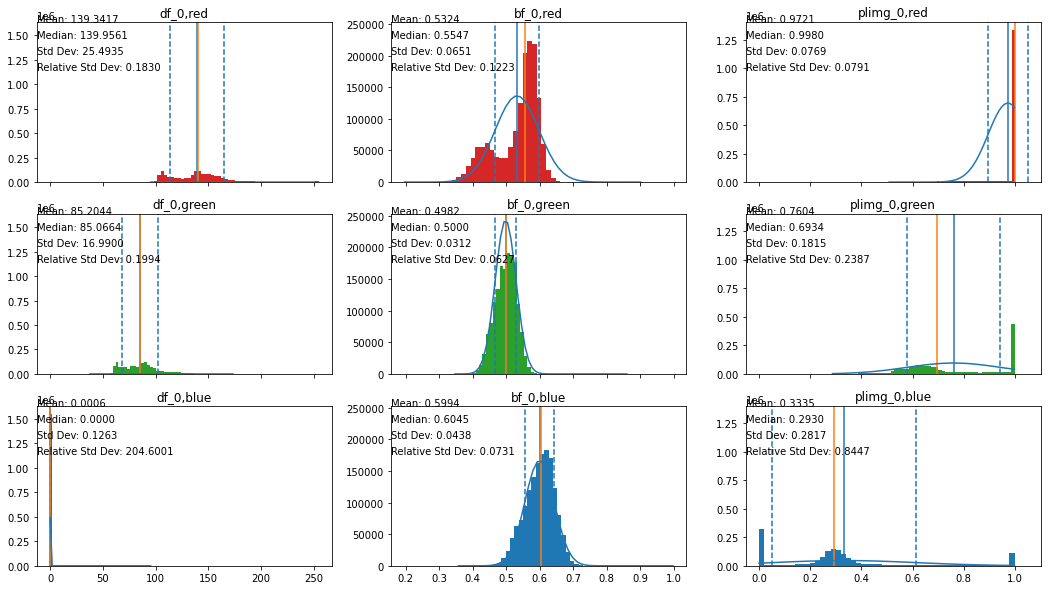

In [81]:
# plot histograms showing image rgb channel intensities
from scipy.stats import norm

n_bins = 50
fig, ax = plt.subplots(3,3, figsize=(18,10), sharex='col', sharey='col')

imgs = ['df_0','bf_0','plimg_0']
channel_names = ['red','green','blue']
colors = ['tab:red','tab:green','tab:blue']

for x in range(3):
    for y in range(3):
        # compute stats on the channel
        channel = rawdf[imgs[x]][i][:,:,y].flatten()
        mean = np.mean(channel)
        median = np.median(channel)
        std = np.std(channel)
        rsd = std / mean # coefficient of variation / relative standard deviation

        # now plot data
        ax[y,x].set_title(f'{imgs[x]},{channel_names[y]}')
        hist, bins, _ = ax[y,x].hist(
            channel,
            bins=n_bins,
            color=colors[y]
            )
        ax[y,x].annotate(f'Mean: {mean:.4f}', (0,1), xycoords='axes fraction')
        ax[y,x].annotate(f'Median: {median:.4f}', (0,0.9), xycoords='axes fraction')
        ax[y,x].annotate(f'Std Dev: {std:.4f}', (0,0.8), xycoords='axes fraction')
        ax[y,x].annotate(f'Relative Std Dev: {rsd:.4f}', (0,0.7), xycoords='axes fraction')

        ax[y,x].axvline(mean)
        ax[y,x].axvline(mean+std, linestyle='--')
        ax[y,x].axvline(mean-std, linestyle='--')
        ax[y,x].axvline(median, color='tab:orange')

        # try fitting a gaussian curve to the channel distribution
        mu, sigma = norm.fit(channel)
        print(mu, sigma)
        xpdf = np.linspace(np.min(channel), np.max(channel))
        ypdf = norm.pdf(xpdf, mu, sigma) * np.max(hist)/10
        ax[y,x].plot(xpdf, ypdf)

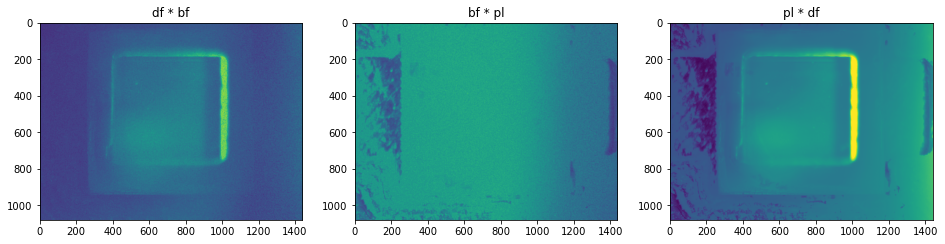

In [11]:
# try overlaying bf/df/pl images to see how it looks

# try each of the 3 possible two-image combinations
# for now the "filter" is simple multiplication
fig, ax = plt.subplots(1,3, figsize=(16,10))

ax[0].set_title('df * bf')
ax[1].set_title('bf * pl')
ax[2].set_title('pl * df')

ax[0].imshow(rawdf['df_0'][i][:,:,0] * rawdf['bf_0'][i][:,:,0]) # df * bf
ax[1].imshow(rawdf['bf_0'][i][:,:,0] * rawdf['plimg_0'][i][:,:,0]) # bf * pl
ax[2].imshow(rawdf['plimg_0'][i][:,:,0] * rawdf['df_0'][i][:,:,0]) # pl * df

Text(0.5, 1.0, 'PL and Transmission Spectra')

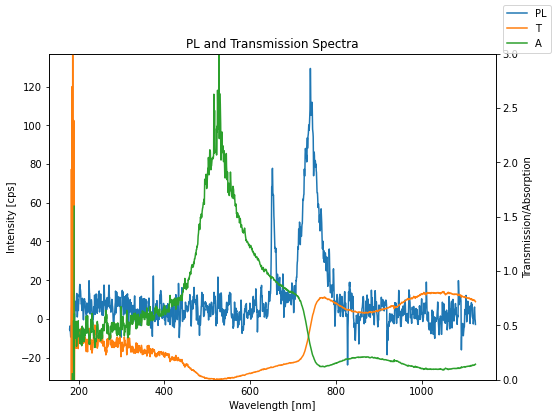

In [12]:
# plot the pl and transmission spectra

fig, ax_pl = plt.subplots(figsize=(8,6))
ax_pl.plot(rawdf['pl_0'][i]['wl'], rawdf['pl_0'][i]['cps'])
ax_pl.set_xlabel('Wavelength [nm]')
ax_pl.set_ylabel('Intensity [cps]')

ax_t = ax_pl.twinx()
ax_t.set_ylabel('Transmission/Absorption')

ax_t.set_ylim(0, 3)
ax_t.plot(rawdf['t_0'][i]['wl'], rawdf['t_0'][i]['t'], color='tab:orange')
ax_t.plot(rawdf['t_0'][i]['wl'], rawdf['t_0'][i]['a'], color='tab:green')

fig.legend(['PL', 'T', 'A'])
plt.title('PL and Transmission Spectra')

In [13]:
import os
import glob
import regex

# now get the input (sampledataframe, maestro_netlist, stocksolutions)
# TODO: find a way to automatically pair input with output folder

inputdir_0 = 'data/input/20221011_3A3X_B9/'

sampledf_files = glob.glob(os.path.join(inputdir_0, '*/sampledataframe*.csv'), recursive=True)
solution_files = glob.glob(os.path.join(inputdir_0, '*/stocksolutions*.csv'), recursive=True)
print(sampledf_files)
print(solution_files)

sampledfs = {}
for f in sampledf_files:
    name = regex.search('-.+\.', os.path.basename(f)).group()[1:-1]
    sampledfs[name] = pd.read_csv(f)

solutiondfs = {}
for f in solution_files:
    name = regex.search('-.+\.', os.path.basename(f)).group()[1:-1]
    solutiondfs[name] = pd.read_csv(f)

sampledfs['htl']


['data/input/20221011_3A3X_B9/B9_0_HTL/sampledataframe_B9-htl.csv', 'data/input/20221011_3A3X_B9/B9_1_PSK/sampledataframe_B9-psk.csv', 'data/input/20221011_3A3X_B9/B9_2_Char/sampledataframe_B9-char.csv']
['data/input/20221011_3A3X_B9/B9_0_HTL/stocksolutions_B9-htl.csv', 'data/input/20221011_3A3X_B9/B9_1_PSK/stocksolutions_B9-psk.csv', 'data/input/20221011_3A3X_B9/B9_2_Char/stocksolutions_B9-char.csv']


,Unnamed: 0,name,storage_tray,storage_slot,substrate,worklist,spincoat0_drop0_time,spincoat0_drop0_height,spincoat0_drop0_rate,spincoat0_drop0_volume,spincoat0_drop0_molarity,spincoat0_drop0_solutes,spincoat0_drop0_solutes_dict,spincoat0_drop0_solvent,spincoat0_drop0_solvent_dict
0,0,sample0,Tray2,A1,ITO,"[{""name"": ""spincoat"", ""start"": NaN, ""id"": ""spi...",-5,2,80,40,0.002,SAMS_HTL,"{""SAMS"": 0.002, ""HTL"": 0.002}",Ethanol,"{""Ethanol"": 1.0}"
1,1,sample1,Tray2,A2,ITO,"[{""name"": ""spincoat"", ""start"": NaN, ""id"": ""spi...",-5,2,80,40,0.002,SAMS_HTL,"{""SAMS"": 0.002, ""HTL"": 0.002}",Ethanol,"{""Ethanol"": 1.0}"
2,2,sample2,Tray2,A3,ITO,"[{""name"": ""spincoat"", ""start"": NaN, ""id"": ""spi...",-5,2,80,40,0.002,SAMS_HTL,"{""SAMS"": 0.002, ""HTL"": 0.002}",Ethanol,"{""Ethanol"": 1.0}"
3,3,sample3,Tray2,A4,ITO,"[{""name"": ""spincoat"", ""start"": NaN, ""id"": ""spi...",-5,2,80,40,0.002,SAMS_HTL,"{""SAMS"": 0.002, ""HTL"": 0.002}",Ethanol,"{""Ethanol"": 1.0}"
4,4,sample4,Tray2,A5,ITO,"[{""name"": ""spincoat"", ""start"": NaN, ""id"": ""spi...",-5,2,80,40,0.002,SAMS_HTL,"{""SAMS"": 0.002, ""HTL"": 0.002}",Ethanol,"{""Ethanol"": 1.0}"
5,5,sample5,Tray2,B1,ITO,"[{""name"": ""spincoat"", ""start"": NaN, ""id"": ""spi...",-5,2,80,40,0.002,SAMS_HTL,"{""SAMS"": 0.002, ""HTL"": 0.002}",Ethanol,"{""Ethanol"": 1.0}"
6,6,sample6,Tray2,B2,ITO,"[{""name"": ""spincoat"", ""start"": NaN, ""id"": ""spi...",-5,2,80,40,0.002,SAMS_HTL,"{""SAMS"": 0.002, ""HTL"": 0.002}",Ethanol,"{""Ethanol"": 1.0}"
7,7,sample7,Tray2,B3,ITO,"[{""name"": ""spincoat"", ""start"": NaN, ""id"": ""spi...",-5,2,80,40,0.002,SAMS_HTL,"{""SAMS"": 0.002, ""HTL"": 0.002}",Ethanol,"{""Ethanol"": 1.0}"
8,8,sample8,Tray2,B4,ITO,"[{""name"": ""spincoat"", ""start"": NaN, ""id"": ""spi...",-5,2,80,40,0.002,SAMS_HTL,"{""SAMS"": 0.002, ""HTL"": 0.002}",Ethanol,"{""Ethanol"": 1.0}"
9,9,sample9,Tray2,B5,ITO,"[{""name"": ""spincoat"", ""start"": NaN, ""id"": ""spi...",-5,2,80,40,0.002,SAMS_HTL,"{""SAMS"": 0.002, ""HTL"": 0.002}",Ethanol,"{""Ethanol"": 1.0}"


In [14]:
sampledfs['char']

,Unnamed: 0,name,storage_tray,storage_slot,substrate,worklist
0,0,sample0,Tray2,A1,PSK-pre,"[{""name"": ""characterize"", ""start"": NaN, ""id"": ..."
1,1,sample1,Tray2,A2,PSK-pre,"[{""name"": ""characterize"", ""start"": NaN, ""id"": ..."
2,2,sample2,Tray2,A3,PSK-pre,"[{""name"": ""characterize"", ""start"": NaN, ""id"": ..."
3,3,sample3,Tray2,A4,PSK-pre,"[{""name"": ""characterize"", ""start"": NaN, ""id"": ..."
4,4,sample4,Tray2,A5,PSK-pre,"[{""name"": ""characterize"", ""start"": NaN, ""id"": ..."
5,5,sample5,Tray2,B1,PSK-pre,"[{""name"": ""characterize"", ""start"": NaN, ""id"": ..."
6,6,sample6,Tray2,B2,PSK-pre,"[{""name"": ""characterize"", ""start"": NaN, ""id"": ..."
7,7,sample7,Tray2,B3,PSK-pre,"[{""name"": ""characterize"", ""start"": NaN, ""id"": ..."
8,8,sample8,Tray2,B4,PSK-pre,"[{""name"": ""characterize"", ""start"": NaN, ""id"": ..."
9,9,sample9,Tray2,B5,PSK-pre,"[{""name"": ""characterize"", ""start"": NaN, ""id"": ..."


In [15]:
# parse characterization worklist json
worklist = pd.concat([pd.read_json(x) for x in sampledfs['char']['worklist']])
worklist.index = worklist.index.rename('step_num')

worklist

,name,start,id,details,sample,precedent,duration
step_num,,,,,,,
0,characterize,NaN,characterize-300bae59-50a1-41d3-a91b-a1c7dd2c2114,{'characterization_tasks': [{'name': 'PL_635nm...,sample0,NaN,131
0,characterize,NaN,characterize-534033d0-bb7c-4fb6-a23d-ae13b0a56d57,{'characterization_tasks': [{'name': 'PL_635nm...,sample1,NaN,131
0,characterize,NaN,characterize-f3bf0c0e-d31e-48b2-b63b-3bb437f3ddd0,{'characterization_tasks': [{'name': 'PL_635nm...,sample2,NaN,131
0,characterize,NaN,characterize-ee8a25b4-a784-49a1-a675-60728da0ec7f,{'characterization_tasks': [{'name': 'PL_635nm...,sample3,NaN,131
0,characterize,NaN,characterize-9af9e5db-ec0e-4626-b045-ba93da6351a7,{'characterization_tasks': [{'name': 'PL_635nm...,sample4,NaN,131
0,characterize,NaN,characterize-a1e9d0f7-7b07-49af-b792-5538863dcbb2,{'characterization_tasks': [{'name': 'PL_635nm...,sample5,NaN,131
0,characterize,NaN,characterize-4deb48fe-6737-4e19-950a-a3867d798132,{'characterization_tasks': [{'name': 'PL_635nm...,sample6,NaN,131
0,characterize,NaN,characterize-c3d1a4bf-6492-4f5a-976a-1a873c582874,{'characterization_tasks': [{'name': 'PL_635nm...,sample7,NaN,131
0,characterize,NaN,characterize-002cbaed-a045-4139-aaa3-5fd7af3ed35a,{'characterization_tasks': [{'name': 'PL_635nm...,sample8,NaN,131


In [16]:
# parse characterization worklist details
details = pd.concat([
    pd.DataFrame.from_dict(worklist['details'].values[i]['characterization_tasks'], orient='columns')
        for i in range(len(worklist))
    ])
details.index.name = 'Step'
details #TODO: join with sample number

,name,station,position,duration,details
Step,,,,,
0,PL_635nm,pl_red,286.0,25.32,"{'exposure_times': [0.1, 5, 20], 'num_scans': 1}"
1,Transmission,transmission,286.0,46.54,"{'exposure_times': [0.02, 0.05, 0.2, 1, 5, 15]..."
2,PLImaging,pl_imaging,82.0,6.25,"{'exposure_times': [0.05, 0.2, 1, 5], 'num_fra..."
3,Darkfield,darkfield,82.0,2.50,"{'exposure_time': 0.05, 'num_frames': 50}"
4,Brightfield,brightfield,164.4,0.05,"{'exposure_time': 0.05, 'num_frames': 1}"
...,...,...,...,...,...
0,PL_635nm,pl_red,286.0,25.32,"{'exposure_times': [0.1, 5, 20], 'num_scans': 1}"
1,Transmission,transmission,286.0,46.54,"{'exposure_times': [0.02, 0.05, 0.2, 1, 5, 15]..."
2,PLImaging,pl_imaging,82.0,6.25,"{'exposure_times': [0.05, 0.2, 1, 5], 'num_fra..."
